Epoch:0,loss:1.34
Epoch:10,loss:1.07
Epoch:20,loss:0.82
Epoch:30,loss:0.65
Epoch:40,loss:0.53
Epoch:50,loss:0.43
Epoch:60,loss:0.32
Epoch:70,loss:0.24
Epoch:80,loss:0.20
Epoch:90,loss:0.17
Epoch:100,loss:0.15
Epoch:110,loss:0.13
Epoch:120,loss:0.12
Epoch:130,loss:0.11
Epoch:140,loss:0.10
Epoch:150,loss:0.09
Epoch:160,loss:0.08
Epoch:170,loss:0.07
Epoch:180,loss:0.07
Epoch:190,loss:0.06


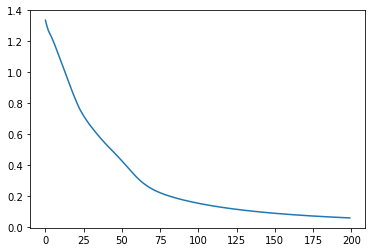

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader
from google.colab import files
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

features = {'sepal_length':iris.data[:,2], 'sepal_width':iris.data[:,1], 'target':iris.target==0}

df = pd.DataFrame(data = features)
X = df.drop('target',axis =1).values
y = df.target.values

features = X
target = y

iris= TensorDataset(torch.FloatTensor(features),torch.LongTensor(target))

iris_loader = DataLoader(iris,batch_size=50,shuffle = True)

class Model(nn.Module):
    
    def __init__(self,in_features=2,h1=6,h2=3,out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


model = Model()

features = torch.FloatTensor(features)
target = torch.LongTensor(target)

X_train, X_test, y_train, y_test=train_test_split(features,target,random_state=59,test_size=0.35)


# Classification problem => Evaluated based on Cross Entropy Loss
criterion = nn.CrossEntropyLoss()

#Optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

#Epochs
epochs = 200
losses = []

for i in range(epochs):
    
    ypred = model.forward(X_train)
    
    loss = criterion(ypred,y_train)
    #Keeping track of loss
    losses.append(loss.item())
    

    if i%10==0:
        print(f'Epoch:{i},loss:{loss:.2f}')
        
    #Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(range(epochs),losses)
plt.show()